In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15976\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
#recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
#recent_date

# Query the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Print the most recent date
print(f"The most recent date in the dataset is: {most_recent_date[0]}")

#This code will query the date column from the Measurement table and order the results in descending order. 
#The first() method is then used to retrieve the most recent date. Finally, the most recent date is printed.

The most recent date in the dataset is: 2017-08-23


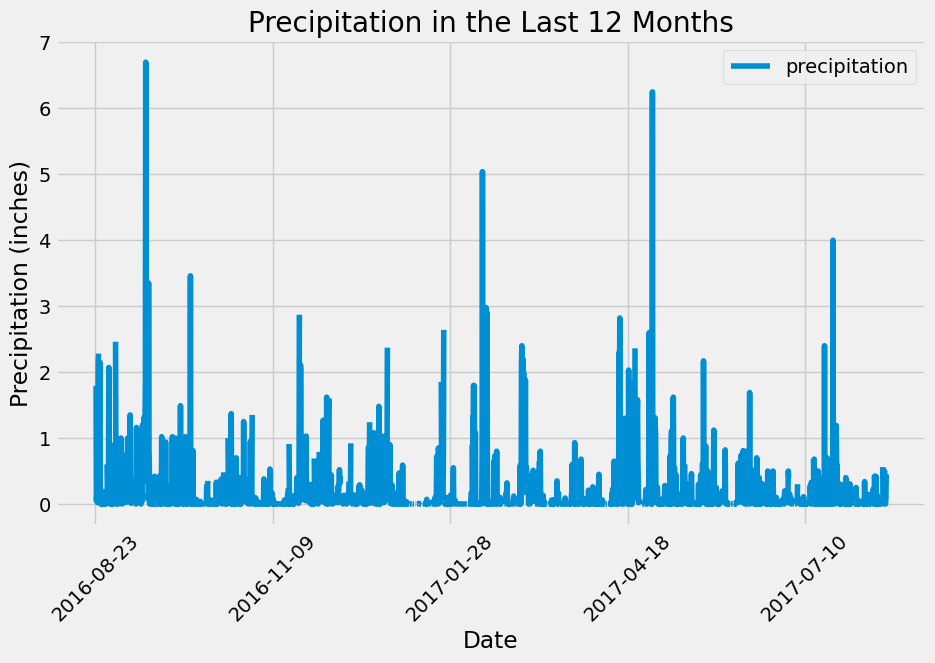

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Step 1: Calculate the date one year from the last date in the dataset
last_date = dt.date(2017,8,23)
one_year_ago = last_date - dt.timedelta(days = 365)

# Step 2: Perform a query to retrieve the data and precipitation scores for the last 12 months
query_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Step 3: Save the query results as a Pandas DataFrame, explicitly setting the column names
df = pd.DataFrame(query_results, columns=['date', 'precipitation'])

# Step 4: Sort the DataFrame by date
df = df.sort_values('date')

# Step 5: Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
import pandas as pd

# Assuming you have a DataFrame named df with a column named 'precipitation'

# Calculate the summary statistics for the precipitation data
summary_stats = df['precipitation'].describe()

# Print the summary statistics
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset

# Query the total number of stations
total_stations = session.query(Station).count()

# Print the total number of stations
print("Total number of stations:", total_stations)

Total number of stations: 9


In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Query the stations and their counts in descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts
#for station, count in station_counts:
    #print(station, count)
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Query the lowest, highest, and average temperature for the most active station
most_active_station_id = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()[0]

temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).first()

# Print the lowest, highest, and average temperature
print("Lowest Temperature:", temperature_stats[0])
print("Highest Temperature:", temperature_stats[1])
print("Average Temperature:", temperature_stats[2])

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


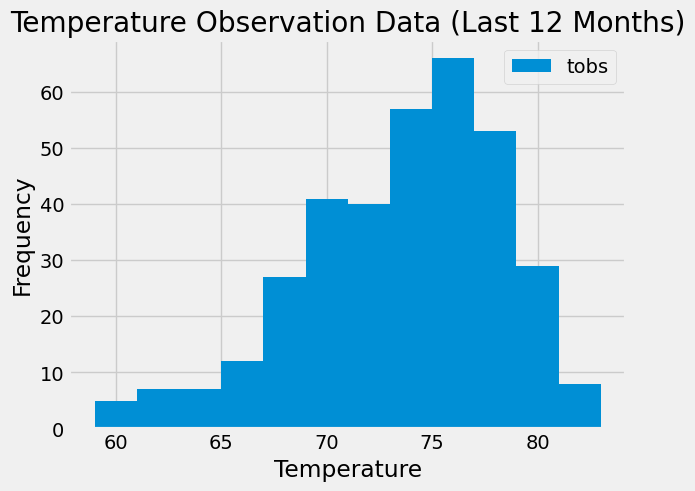

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_results = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(query_results, columns=['temperature'])

# Plot the results as a histogram
plt.hist(df['temperature'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(["tobs"])
plt.title('Temperature Observation Data (Last 12 Months)')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()